DATA SCIENCE IN MARKETING - CUSTOMER SEGMENTATION


1. Preparing the Library

This problem will be solved by using the following libraries below:
- Pandas, used to perform data analysis processing
- Matplotlib, used as a basis for data visualization
- Seaborn, used on top of matplotlib to do more interesting data visualization
- Scikit - Learn, used to prepare data before modeling
- kmodes, is used to perform modeling using the K-Modes and K-Prototypes algorithms.
- Pickle, used to store the model to be made.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path  

- The source of dataset is at the following link: https://storage.googleapis.com/dqlab-dataset/customer_segments.txt

- The first step that needs to be done is to read the data which was originally a text file into a pandas dataframe.


In [2]:
# import dataset  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  
  
# showing the top 5 rows of dataset  
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


Next I need to look at the information from the existing data. So that I can find out the number of rows and columns, column names, identify null values, and also know the data type easily.

In [3]:
# Show dataset info  
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


Conclusion
- The data to be used consists of 50 rows and 7 columns
- No null value in data
- Two columns have numeric data type and five data type string

In any machine learning project, we must understand the basic information from the data we have before doing further analysis. By doing this, we can make sure the data type of each column is correct, find out if there is null data in each column, and also know the names of the columns in the dataset we are using. This information will later determine what process we need to do next.

Numerical Data Exploration
First I need to look at the data distribution of numeric data. Here I will use a boxplot and also a histogram to see the distribution of the data. To create the graph, I need to set up which column is a numeric column. Then use the seaborn library to plot each of the numeric columns, namely 'Age' and 'A year's Spending Value'.

C:\Users\Dadang\AppData\Local\Temp\ipykernel_1976\1018445339.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
C:\Users\Dadang\AppData\Local\Temp\ipykernel_1976\1018445339.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 432x288 with 0 Axes>

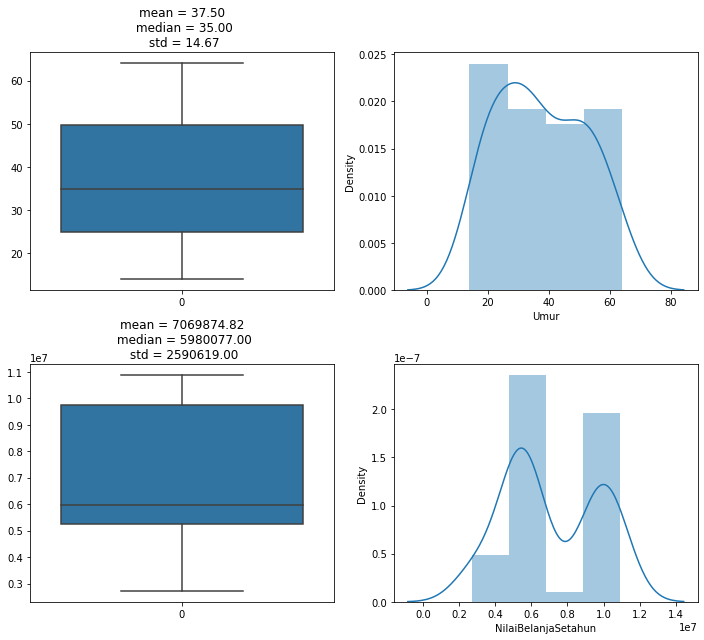

In [12]:
plt.clf()

# Function for plotting
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Calling a function to create a Plot for numeric data  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik) 

Categorical Data Exploration

In addition to numerical data, I also need to look at how the data is distributed in columns that have categorical types, Gender, Profession and Resident Type. I can do this by using the countplot from the seaborn library.

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

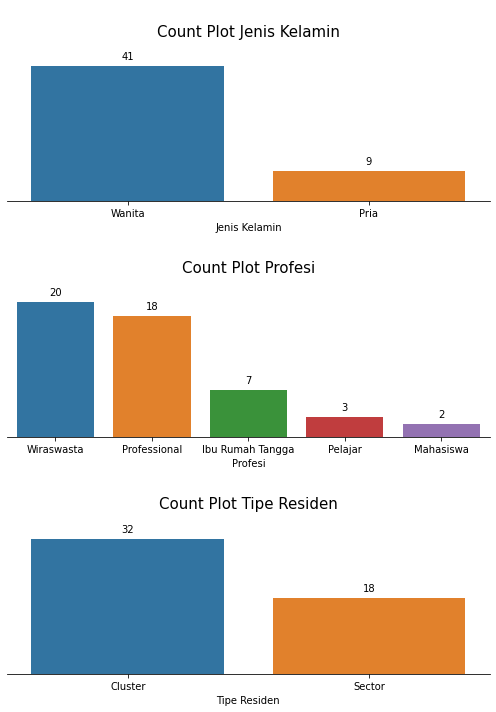

In [9]:
# Setting up categorical columns  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Creating a canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Creating a plot for each categorical column
for i, kol in enumerate(kolom_kategorikal):  
    # Making Plot
    sns.countplot(x=df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Annotate  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Showing plot
plt.show()

Conclusion
From the results of the data exploration, I can get the following information:

- The average age of the customer is 37.5 years
- The average value of a customer's annual spending is 7,069,874.82
- The gender of the customer is dominated by 41 women (82%) and 9 men (18%)
- Most professions are Entrepreneur (40%) followed by Professional (36%) and others (24%)
- Of all customers 64% of them live in Clusters and 36% live in Sector

Preparing Data Before Modeling
Each machine learning model has different characteristics. I have to prepare the data before it is used for modeling. So that it can adjust to the characteristics possessed by each model and get optimal results.

I do the modeling using the unsupervised clustering technique. The algorithm that will be used is K-Prototypes. One of the main factors in this algorithm is that I need to use data that scales between variables equally. In addition, we also need to encode our categorical columns to be numeric. Then combine the results of data processing into one dataframe for use in modeling.


Numerical Column Standardization
In order to get maximum results in the application of this algorithm, I need to make the numerical data that you have on one scale. This can be done by standardizing the data. The goal is that large scale variables do not dominate how the cluster will be formed and also each variable will be considered equally  by the algorithm.

I will Standardize the numeric fields and display the results, and display descriptive statistics before and after standardization to see the difference.

In [29]:
from sklearn.preprocessing import StandardScaler  
  
kolom_numerik  = ['Umur','NilaiBelanjaSetahun']  
  
# Statistics before Standardization
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik ].describe().round(1))  


Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0


In [30]:
# Standardization 
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Creating a DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Displays sample data contents and summary statistics 
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0)) 

Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


Categorical Conversion of Data with Label Encoder
Next I need to convert the categorical type columns into numbers. I will use one of sklearn's functions, namely LabelEncoder. Basically this function will convert customer data from text to numeric.

For example for the Gender column, the text "Male" will be changed to the number 0 and the text "Female" will be changed to the number one. This change we need for all the text before it is used in the K-Prototype algorithm.


In [31]:
# Categorical column name initiation  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
# Make a copy of the data frame  
df_encode = df[kolom_kategorikal].copy()  
  
  
# Performing a labelEncoder for all categorical columns 
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])  
      
# Showing data  
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


Combining Data for Modeling
After completing the previous two stages, I will combine the two processing results into one data frame. This data frame will be used for modeling.


In [32]:
# Merge data frames
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print (df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


K-Prototypes Clustering and Algorithm
Clustering is the process of dividing objects into several groups (clusters) based on the degree of similarity between one object and another.

There are several algorithms to perform this clustering. One of the popular ones is k-means.
K-means itself is usually only used for numerical data. As for the categorical only, we can use k-modes.
Then what if there is a combination of categorical and numerical variables? The answer is we can use the k-prototype algorithm which is a combination of k-means and k-modes. This can be done using the k-modes library which includes the kprototype module.

To use the kprototype algorithm I need to enter the desired number of clusters and also provide a column index for categorical columns.


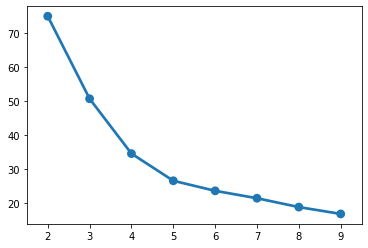

In [34]:
 #Doing Iteration to get Cost's value 
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Visualizing Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()  


Modeling
Then I can create a model with the number of clusters that have been obtained in the previous stage, namely 5 and save the results as a pickle file.
Make a Kprototypes model with a value of k = 5 and a random state = 75. Then save the results in pickle form.

In [35]:
import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))


Using Model
The model that I have created can be used to determine which each customer belongs to which cluster. 
This time I will use the model to determine the customer segments in the dataset.

I will determine the cluster of each customer in the dataset using the previously created kproto model. Then combine the prediction results with the initial data (df) so that we get customer data along with the name of the cluster.

In [36]:
# Determine the segment of each customer   
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Combining initial data and customer segments   
df_final = df.copy()    
df_final['cluster'] = clusters    
print(df_final.head())

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        0  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        3  


Displaying Clusters of Each Customer
After I combine the initial customer data and their clusters, I need to display and observe the results to help in naming each cluster based on its characteristics.

In [37]:
# Display customer data based on its cluster
for i in range(0, 5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013      

Visualization of Clustering Results - Box Plot
I also create a visualization of the clustering results to make it easier for you to do naming in each cluster.


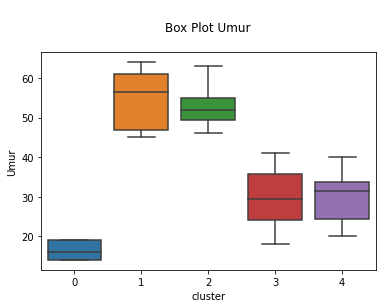

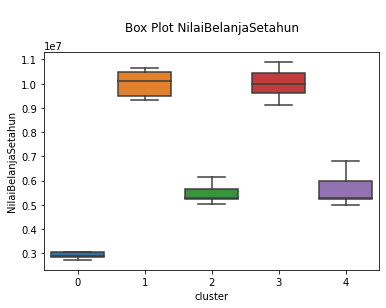

In [38]:
#  Numerical Data
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt. title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 


Visualization of Clustering Results - Count Plot
I also create a visualization of the clustering results by making a countplot to visualize each variable per customer divided by cluster name.

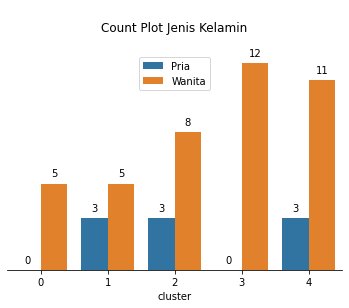

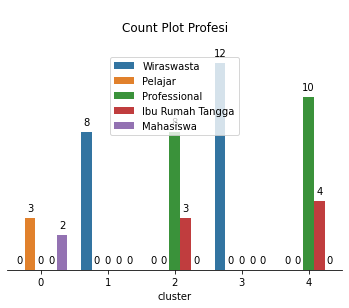

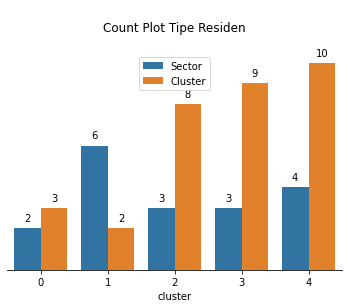

In [39]:
# Categorical Data
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


Name the Cluster
From the results of the observations made, I can give the name of the segment of each cluster number:

Cluster 0: Diamond Young Entrepreneurs, this cluster are entrepreneurs who have an average transaction value of close to 10 million. having age  about 18 - 41 years with an average of 29 years.
Cluster 1: Diamond Senior Entrepreneur, this cluster are entrepreneurs who have an average transaction value of close to 10 million. having age  about 45 - 64 years with an average of 55 years.
Cluster 2: Silver Students, this cluster are students with an average age of 16 years and a yearly expenditure value of close to 3 million.
Cluster 3: Gold Young Members, this cluster are young professionals and housewives with an age range of around 20 - 40 years and with an average  30 years and the annual shopping value is close to 6 million.
Cluster 4: Gold Senior Member, this cluster are professionals and housewives who are aged between 46 - 63 years and with an average 53 years and the annual expenditure value is close to 6 million.

In [40]:
# Mapping column names 
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

Conclusion
Finally, I have succeeded in segmenting customers and getting a suitable name for each cluster:

Cluster 0: Diamond Young Entrepreneurs, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. In addition, this cluster have an age of about 18 - 41 years with an average of 29 years.
Cluster 1: Diamond Senior Entrepreneur, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. This cluster have an age of about 45 - 64 years with an average of 55 years.
Cluster 2: Silver Students, the contents of this cluster are students with an average age of 16 years and a yearly expenditure value of close to 3 million.
Cluster 3: Gold Young Members, the contents of this cluster are young professionals and housewives with an age range of around 20 - 40 years and with an average of 30 years and the annual shopping value is close to 6 million.
Cluster 4: Gold Senior Member, the contents of this cluster are professionals and housewives who are aged between 46 - 63 years and with an average of 53 years and the annual expenditure value is close to 6 million.

Preparing New Data
Here I create a new sample of data to predict with the model that has been created. You do this by creating a dataframe that contains customer information.

In [41]:
# New Data
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Creating Data Frames
new_df = pd.DataFrame(data)  
  
# Viewing Data
print(new_df)  

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


Creating a Data Processing Function
Next I create a function to perform data processing based on the same parameters after did the modeling.
This function will later be used to:
Converting categorical data to numeric
From the previous process we know the representation of each code and its meaning:
Gender
0 : Male
1: Woman
Profession
0 : Housewife
1: Student
2: Student
3: Professional
4: Entrepreneur
Resident Type
1: Sector
0 : Cluster
Next I create a function to convert categorical data into numeric based on that reference.

Standardize numerical columns
To standardize with the same variables at the time of modeling, I need to use the mean and standard deviation of each variable in modeling:
Age
Average: 37.5
Standard Deviation: 14.7
ValueShoppingYear
Average: 7069874.8
Standard Deviation: 2590619.0
From these values I calculate the standardization value (Z) using the formula Z = (x - u)/s where x is each value, u is the average and s is the standard deviation.


In [42]:
def data_preprocess(data):  
    # Data Categorical Conversion
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Gender 
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profession 
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Resident Type 
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Numerical Data standardization 
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardization of Age Column  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardization of Annual Expenditure Value Column
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Combining categorical and numerical data 
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Run function
new_df_model = data_preprocess(new_df)  
  
print(new_df_model) 


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


Calling Models and Making Predictions
Once you have the data ready to use, it's time to call the previously saved model and proceed with making predictions.
I Create a function that can be used to call the model and make predictions and save the results in a single dataframe.

In [43]:
def modelling (data):  
      
    # Calling Model
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Doing Predictions
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Running Function
clusters = modelling(new_df_model)  
  
print(clusters)  

[1]


Naming a Segment
Here I have to create a function called name_segment with the original data and clusters as input.

In [44]:
def menamakan_segmen (data_asli, clusters):  
      
    # Merge cluster and original data
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters  
      
    # Naming the segment
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df  
  
# Running Function 
new_final_df = menamakan_segmen(new_df,clusters)  
  
print(new_final_df)  

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  


END